In [1]:
import sys
sys.path.append("../../")

from SportsTracking.sports_field_registration.scc_v_sd.elements.perspective_transform import Perspective_Transform
from SportsTracking.sports_field_registration.scc_v_sd.elements.assets import transform_matrix


import torch
import os
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

In [2]:
def load_field():
    h = 720
    w = 1280
    
    bg_ratio = int(np.ceil(w/(3*115)))
    gt_img = cv2.imread('../../SportsTracking/sports_field_registration/scc_v_sd/inference/football-field.jpg')
    gt_img = cv2.resize(gt_img,(115*bg_ratio, 74*bg_ratio))
    gt_h, gt_w, _ = gt_img.shape
    return gt_img, gt_h, gt_w, h, w, bg_ratio

In [3]:
def visualise_frame(sequence, frame):
    img_file = os.path.join(sequence, f'img1/{frame:06d}.jpg')
    img = cv2.imread(img_file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [4]:
def detection(sequence, frame):
    txt_path = os.path.join(sequence, 'gt/gt.txt')

    bbox_list = []
    with open(txt_path, 'r') as f:
        for line in f.readlines():
            linelist = line.split(',')
            img_id = linelist[0]

            if int(img_id) == frame:
                obj_id = linelist[1]
                bbox = [float(linelist[2]), float(linelist[3]), float(linelist[2]) + float(linelist[4]), float(linelist[3]) + float(linelist[5]), int(float(obj_id))]
                bbox_list.append(bbox)
            
    return bbox_list

In [5]:
def visualise_detections(sequence, frame):
    img_file = os.path.join(sequence, f'img1/{frame:06d}.jpg')
    img = cv2.imread(img_file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    detections = detection(sequence, frame)
    for bbox in detections:
        cv2.rectangle(img, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (255, 0, 0), thickness=2)
        cv2.putText(img, "{}".format(int(bbox[4])), (int(bbox[0]), int(bbox[1])), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
    plt.imshow(img)

In [6]:
def perspective_transform(sequence, frame):
    img_file = os.path.join(sequence, f'img1/{frame:06d}.jpg')
    img = cv2.imread(img_file)

    perspective_transform = Perspective_Transform()
    M, warped_image = perspective_transform.homography_matrix(img)
    return M, warped_image

In [7]:
def visualise_perspective_transform(sequence, frame):
    M, warped_image = perspective_transform(sequence, frame)
    plt.imshow(warped_image)

In [8]:
def birds_eye_view(sequence, frame):
    detections = detection(sequence, frame)
    M, _ = perspective_transform(sequence, frame)

    field_img, field_img_h, field_img_w, field_h, field_w, field_ratio = load_field()
    birds_eye_img = field_img.copy()
    for xyxy in detections:
        x_center = (xyxy[0] + xyxy[2])/2 
        y_center = xyxy[3]
        coords = transform_matrix(M, (x_center, y_center), (field_h, field_w), (field_img_h, field_img_w))
        cv2.circle(birds_eye_img, coords, field_ratio + 1, (255, 0, 0), -1)
    plt.imshow(birds_eye_img)

In [9]:
sequence = '../../datasets/SportsMOT/val/v_i2_L4qquVg0_c009'
frame = 250

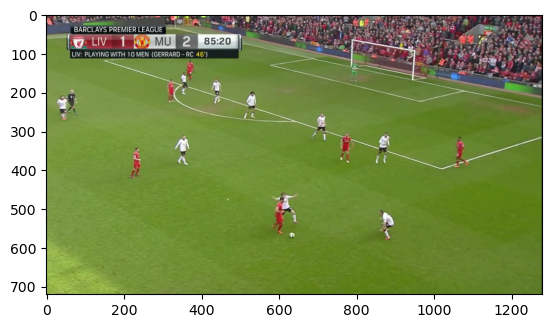

In [10]:
visualise_frame(sequence, frame)

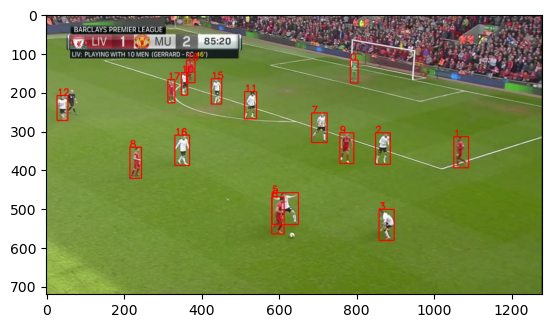

In [11]:
visualise_detections(sequence, frame)

Perspective Transform model loaded!


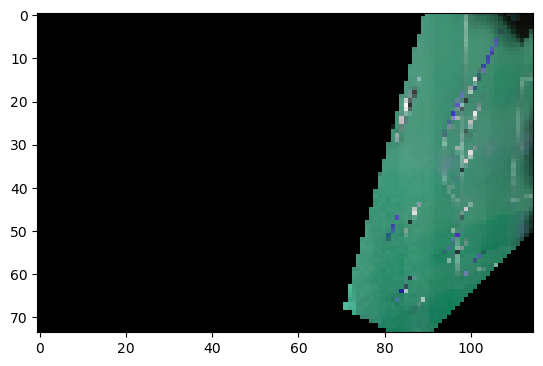

In [12]:
visualise_perspective_transform(sequence, frame)

Perspective Transform model loaded!


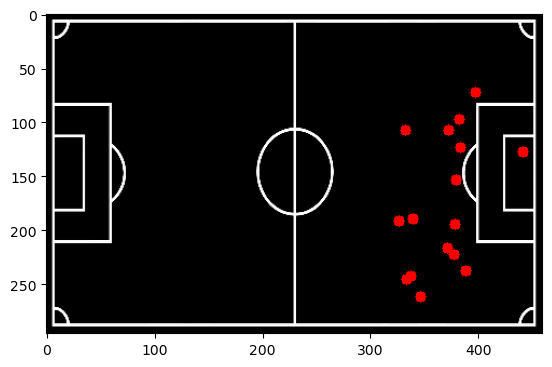

In [13]:
birds_eye_view(sequence, frame)